# Formulation of News Dataset

In [104]:
# https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

In [1]:
import pandas as pd
import numpy as np
import missingno as mn

import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

import glob
import os

import abc
import numpy as np

import pandas as pd
import abc
import re
import nltk
from sklearn import model_selection 
from dateutil.parser import parse
from matplotlib import pyplot
import datetime

%matplotlib inline

In [2]:
def createComparableDataset(_df):
    _df.date = pd.to_datetime(_df.date)
    _df = _df[_df['date'] >= pd.to_datetime('2015/05/04')]
    _df = _df[_df['date'] <= pd.to_datetime('2019/03/28')]
    return _df

In [3]:
def getFeaturesAndTargetRemoveDate(_df):
    try:
        train_y = _df['target']
        train = _df.drop(['date','target'],axis =1)
    except:
        train_y = _df['Target']
        train = _df.drop(['date','Target'],axis =1)        
    return train, train_y

In [4]:
def prepareDataSet(_df):
    _df.date = pd.to_datetime(_df.date)
    train = _df[_df['date'] < pd.to_datetime('2019/01/01')]
    test = _df[_df['date'] >= pd.to_datetime('2019/01/01')]
    
    train, train_y = getFeaturesAndTargetRemoveDate(train)
    test, test_y = getFeaturesAndTargetRemoveDate(test)
    return train, train_y,test, test_y

In [6]:
pathOfCwd = os.getcwd()
pathOfCwd
TweetsFolder = r'\\Tweets\\' # use your path
path = pathOfCwd +TweetsFolder
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header='infer', sep=';', error_bad_lines=False)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

b'Skipping line 155: expected 9 fields, saw 10\nSkipping line 167: expected 9 fields, saw 11\nSkipping line 170: expected 9 fields, saw 10\nSkipping line 177: expected 9 fields, saw 10\nSkipping line 180: expected 9 fields, saw 10\nSkipping line 200: expected 9 fields, saw 10\nSkipping line 279: expected 9 fields, saw 10\nSkipping line 287: expected 9 fields, saw 10\nSkipping line 306: expected 9 fields, saw 10\nSkipping line 317: expected 9 fields, saw 10\nSkipping line 344: expected 9 fields, saw 10\nSkipping line 346: expected 9 fields, saw 10\nSkipping line 350: expected 9 fields, saw 10\nSkipping line 351: expected 9 fields, saw 10\nSkipping line 358: expected 9 fields, saw 10\nSkipping line 377: expected 9 fields, saw 10\nSkipping line 381: expected 9 fields, saw 10\nSkipping line 397: expected 9 fields, saw 10\nSkipping line 400: expected 9 fields, saw 11\nSkipping line 401: expected 9 fields, saw 10\nSkipping line 408: expected 9 fields, saw 10\nSkipping line 409: expected 9 fi

b'Skipping line 76161: expected 9 fields, saw 10\nSkipping line 76187: expected 9 fields, saw 10\nSkipping line 76189: expected 9 fields, saw 10\nSkipping line 76191: expected 9 fields, saw 10\nSkipping line 76193: expected 9 fields, saw 10\nSkipping line 76234: expected 9 fields, saw 10\nSkipping line 76235: expected 9 fields, saw 10\nSkipping line 76238: expected 9 fields, saw 10\nSkipping line 76239: expected 9 fields, saw 10\nSkipping line 76268: expected 9 fields, saw 10\nSkipping line 76446: expected 9 fields, saw 10\nSkipping line 76505: expected 9 fields, saw 10\nSkipping line 76559: expected 9 fields, saw 10\nSkipping line 76560: expected 9 fields, saw 10\nSkipping line 76561: expected 9 fields, saw 10\nSkipping line 76562: expected 9 fields, saw 10\nSkipping line 76563: expected 9 fields, saw 10\nSkipping line 76569: expected 9 fields, saw 10\nSkipping line 76570: expected 9 fields, saw 10\nSkipping line 76573: expected 9 fields, saw 10\nSkipping line 76576: expected 9 fields

b'Skipping line 144866: expected 9 fields, saw 10\nSkipping line 144894: expected 9 fields, saw 10\nSkipping line 144950: expected 9 fields, saw 10\nSkipping line 144967: expected 9 fields, saw 11\nSkipping line 145004: expected 9 fields, saw 10\nSkipping line 145009: expected 9 fields, saw 10\nSkipping line 145012: expected 9 fields, saw 10\nSkipping line 145015: expected 9 fields, saw 10\nSkipping line 145035: expected 9 fields, saw 10\nSkipping line 145037: expected 9 fields, saw 10\nSkipping line 145048: expected 9 fields, saw 10\nSkipping line 145064: expected 9 fields, saw 10\nSkipping line 145071: expected 9 fields, saw 11\nSkipping line 145076: expected 9 fields, saw 10\nSkipping line 145087: expected 9 fields, saw 10\nSkipping line 145089: expected 9 fields, saw 10\nSkipping line 145091: expected 9 fields, saw 10\nSkipping line 145092: expected 9 fields, saw 10\nSkipping line 145095: expected 9 fields, saw 10\nSkipping line 145096: expected 9 fields, saw 10\nSkipping line 1451

b'Skipping line 221713: expected 9 fields, saw 10\nSkipping line 221723: expected 9 fields, saw 10\nSkipping line 221758: expected 9 fields, saw 10\nSkipping line 221763: expected 9 fields, saw 10\nSkipping line 221769: expected 9 fields, saw 10\nSkipping line 221785: expected 9 fields, saw 11\nSkipping line 221795: expected 9 fields, saw 10\nSkipping line 221802: expected 9 fields, saw 11\nSkipping line 221838: expected 9 fields, saw 10\nSkipping line 221849: expected 9 fields, saw 10\nSkipping line 221858: expected 9 fields, saw 11\nSkipping line 221868: expected 9 fields, saw 10\nSkipping line 221889: expected 9 fields, saw 10\nSkipping line 221906: expected 9 fields, saw 10\nSkipping line 221911: expected 9 fields, saw 10\nSkipping line 221925: expected 9 fields, saw 10\nSkipping line 221930: expected 9 fields, saw 10\nSkipping line 221946: expected 9 fields, saw 10\nSkipping line 221960: expected 9 fields, saw 10\nSkipping line 221978: expected 9 fields, saw 10\nSkipping line 2219

b'Skipping line 291839: expected 9 fields, saw 10\nSkipping line 291862: expected 9 fields, saw 10\nSkipping line 291938: expected 9 fields, saw 10\nSkipping line 292012: expected 9 fields, saw 10\nSkipping line 292092: expected 9 fields, saw 10\nSkipping line 292134: expected 9 fields, saw 10\nSkipping line 292156: expected 9 fields, saw 11\nSkipping line 292209: expected 9 fields, saw 10\nSkipping line 292327: expected 9 fields, saw 10\nSkipping line 292337: expected 9 fields, saw 10\nSkipping line 292358: expected 9 fields, saw 10\nSkipping line 292465: expected 9 fields, saw 12\nSkipping line 292627: expected 9 fields, saw 11\nSkipping line 292764: expected 9 fields, saw 10\nSkipping line 292798: expected 9 fields, saw 10\nSkipping line 292799: expected 9 fields, saw 10\nSkipping line 292800: expected 9 fields, saw 10\nSkipping line 292877: expected 9 fields, saw 10\nSkipping line 292898: expected 9 fields, saw 10\nSkipping line 293244: expected 9 fields, saw 11\nSkipping line 2932

b'Skipping line 358494: expected 9 fields, saw 10\nSkipping line 358495: expected 9 fields, saw 10\nSkipping line 358498: expected 9 fields, saw 10\nSkipping line 358499: expected 9 fields, saw 10\nSkipping line 358631: expected 9 fields, saw 10\nSkipping line 358897: expected 9 fields, saw 10\nSkipping line 359158: expected 9 fields, saw 10\nSkipping line 359231: expected 9 fields, saw 10\nSkipping line 359325: expected 9 fields, saw 10\nSkipping line 359592: expected 9 fields, saw 10\nSkipping line 359747: expected 9 fields, saw 10\nSkipping line 359748: expected 9 fields, saw 10\nSkipping line 359751: expected 9 fields, saw 10\nSkipping line 359858: expected 9 fields, saw 10\nSkipping line 360009: expected 9 fields, saw 10\nSkipping line 360093: expected 9 fields, saw 10\nSkipping line 360094: expected 9 fields, saw 10\nSkipping line 360182: expected 9 fields, saw 10\nSkipping line 360213: expected 9 fields, saw 10\nSkipping line 360241: expected 9 fields, saw 10\nSkipping line 3604

b'Skipping line 425073: expected 9 fields, saw 10\nSkipping line 425102: expected 9 fields, saw 10\nSkipping line 425137: expected 9 fields, saw 10\nSkipping line 425161: expected 9 fields, saw 10\nSkipping line 425178: expected 9 fields, saw 10\nSkipping line 425190: expected 9 fields, saw 10\nSkipping line 425249: expected 9 fields, saw 10\nSkipping line 425288: expected 9 fields, saw 10\nSkipping line 425312: expected 9 fields, saw 11\nSkipping line 425382: expected 9 fields, saw 10\nSkipping line 425522: expected 9 fields, saw 10\nSkipping line 425587: expected 9 fields, saw 10\nSkipping line 425852: expected 9 fields, saw 10\nSkipping line 425911: expected 9 fields, saw 10\nSkipping line 425973: expected 9 fields, saw 10\nSkipping line 426009: expected 9 fields, saw 10\nSkipping line 426110: expected 9 fields, saw 10\nSkipping line 426115: expected 9 fields, saw 10\nSkipping line 426117: expected 9 fields, saw 10\nSkipping line 426195: expected 9 fields, saw 10\nSkipping line 4262

b'Skipping line 491746: expected 9 fields, saw 10\nSkipping line 491747: expected 9 fields, saw 10\nSkipping line 491748: expected 9 fields, saw 10\nSkipping line 491821: expected 9 fields, saw 11\nSkipping line 491829: expected 9 fields, saw 10\nSkipping line 491839: expected 9 fields, saw 10\nSkipping line 491857: expected 9 fields, saw 10\nSkipping line 491858: expected 9 fields, saw 10\nSkipping line 491889: expected 9 fields, saw 10\nSkipping line 491907: expected 9 fields, saw 10\nSkipping line 491910: expected 9 fields, saw 10\nSkipping line 491916: expected 9 fields, saw 10\nSkipping line 491918: expected 9 fields, saw 10\nSkipping line 491919: expected 9 fields, saw 10\nSkipping line 491922: expected 9 fields, saw 10\nSkipping line 492264: expected 9 fields, saw 10\nSkipping line 492374: expected 9 fields, saw 10\nSkipping line 492381: expected 9 fields, saw 10\nSkipping line 492399: expected 9 fields, saw 10\nSkipping line 492481: expected 9 fields, saw 10\nSkipping line 4925

b'Skipping line 558431: expected 9 fields, saw 10\nSkipping line 558434: expected 9 fields, saw 10\nSkipping line 558450: expected 9 fields, saw 10\nSkipping line 558486: expected 9 fields, saw 10\nSkipping line 558629: expected 9 fields, saw 10\nSkipping line 558691: expected 9 fields, saw 10\nSkipping line 558697: expected 9 fields, saw 10\nSkipping line 558736: expected 9 fields, saw 10\nSkipping line 558789: expected 9 fields, saw 10\nSkipping line 558812: expected 9 fields, saw 10\nSkipping line 558813: expected 9 fields, saw 10\nSkipping line 558841: expected 9 fields, saw 10\nSkipping line 558881: expected 9 fields, saw 10\nSkipping line 559061: expected 9 fields, saw 10\nSkipping line 559199: expected 9 fields, saw 10\nSkipping line 559218: expected 9 fields, saw 10\nSkipping line 559226: expected 9 fields, saw 10\nSkipping line 559271: expected 9 fields, saw 10\nSkipping line 559278: expected 9 fields, saw 10\nSkipping line 559280: expected 9 fields, saw 10\nSkipping line 5592

b'Skipping line 625317: expected 9 fields, saw 10\nSkipping line 625330: expected 9 fields, saw 10\nSkipping line 625398: expected 9 fields, saw 10\nSkipping line 625436: expected 9 fields, saw 10\nSkipping line 625498: expected 9 fields, saw 10\nSkipping line 625601: expected 9 fields, saw 10\nSkipping line 625633: expected 9 fields, saw 10\nSkipping line 625673: expected 9 fields, saw 10\nSkipping line 625773: expected 9 fields, saw 10\nSkipping line 625775: expected 9 fields, saw 10\nSkipping line 625791: expected 9 fields, saw 10\nSkipping line 625804: expected 9 fields, saw 10\nSkipping line 625846: expected 9 fields, saw 10\nSkipping line 625918: expected 9 fields, saw 10\nSkipping line 625953: expected 9 fields, saw 10\nSkipping line 625993: expected 9 fields, saw 10\nSkipping line 626167: expected 9 fields, saw 10\nSkipping line 626215: expected 9 fields, saw 10\nSkipping line 626270: expected 9 fields, saw 10\nSkipping line 626292: expected 9 fields, saw 10\nSkipping line 6262

b'Skipping line 692002: expected 9 fields, saw 10\nSkipping line 692134: expected 9 fields, saw 10\nSkipping line 692202: expected 9 fields, saw 10\nSkipping line 692208: expected 9 fields, saw 10\nSkipping line 692217: expected 9 fields, saw 10\nSkipping line 692468: expected 9 fields, saw 10\nSkipping line 692537: expected 9 fields, saw 10\nSkipping line 692538: expected 9 fields, saw 10\nSkipping line 692548: expected 9 fields, saw 10\nSkipping line 692554: expected 9 fields, saw 10\nSkipping line 692561: expected 9 fields, saw 10\nSkipping line 692562: expected 9 fields, saw 10\nSkipping line 692573: expected 9 fields, saw 10\nSkipping line 692575: expected 9 fields, saw 10\nSkipping line 692763: expected 9 fields, saw 10\nSkipping line 692829: expected 9 fields, saw 10\nSkipping line 692834: expected 9 fields, saw 12\nSkipping line 692952: expected 9 fields, saw 10\nSkipping line 692953: expected 9 fields, saw 10\nSkipping line 692998: expected 9 fields, saw 10\nSkipping line 6929

b'Skipping line 758782: expected 9 fields, saw 10\nSkipping line 758867: expected 9 fields, saw 11\nSkipping line 758932: expected 9 fields, saw 10\nSkipping line 758961: expected 9 fields, saw 11\nSkipping line 758978: expected 9 fields, saw 10\nSkipping line 759012: expected 9 fields, saw 10\nSkipping line 759037: expected 9 fields, saw 11\nSkipping line 759163: expected 9 fields, saw 10\nSkipping line 759315: expected 9 fields, saw 11\nSkipping line 759318: expected 9 fields, saw 10\nSkipping line 759333: expected 9 fields, saw 10\nSkipping line 759334: expected 9 fields, saw 11\nSkipping line 759367: expected 9 fields, saw 11\nSkipping line 759443: expected 9 fields, saw 10\nSkipping line 759457: expected 9 fields, saw 10\nSkipping line 759475: expected 9 fields, saw 10\nSkipping line 759477: expected 9 fields, saw 10\nSkipping line 759508: expected 9 fields, saw 10\nSkipping line 759527: expected 9 fields, saw 11\nSkipping line 759543: expected 9 fields, saw 10\nSkipping line 7595

b'Skipping line 825552: expected 9 fields, saw 10\nSkipping line 825563: expected 9 fields, saw 10\nSkipping line 825648: expected 9 fields, saw 10\nSkipping line 825682: expected 9 fields, saw 10\nSkipping line 825688: expected 9 fields, saw 10\nSkipping line 825706: expected 9 fields, saw 10\nSkipping line 825707: expected 9 fields, saw 10\nSkipping line 825708: expected 9 fields, saw 10\nSkipping line 825738: expected 9 fields, saw 10\nSkipping line 825739: expected 9 fields, saw 10\nSkipping line 825831: expected 9 fields, saw 10\nSkipping line 825849: expected 9 fields, saw 10\nSkipping line 826104: expected 9 fields, saw 10\nSkipping line 826238: expected 9 fields, saw 10\nSkipping line 826512: expected 9 fields, saw 10\nSkipping line 826534: expected 9 fields, saw 10\nSkipping line 826627: expected 9 fields, saw 10\nSkipping line 826673: expected 9 fields, saw 10\nSkipping line 826677: expected 9 fields, saw 10\nSkipping line 826759: expected 9 fields, saw 10\nSkipping line 8269

b'Skipping line 1528: expected 10 fields, saw 11\nSkipping line 5022: expected 10 fields, saw 12\nSkipping line 6255: expected 10 fields, saw 13\nSkipping line 6448: expected 10 fields, saw 11\nSkipping line 7029: expected 10 fields, saw 11\nSkipping line 8272: expected 10 fields, saw 11\nSkipping line 8564: expected 10 fields, saw 11\nSkipping line 11493: expected 10 fields, saw 11\nSkipping line 11648: expected 10 fields, saw 11\nSkipping line 13065: expected 10 fields, saw 13\nSkipping line 15047: expected 10 fields, saw 13\nSkipping line 16316: expected 10 fields, saw 11\nSkipping line 18299: expected 10 fields, saw 12\nSkipping line 18668: expected 10 fields, saw 13\nSkipping line 18669: expected 10 fields, saw 13\nSkipping line 18670: expected 10 fields, saw 11\nSkipping line 20350: expected 10 fields, saw 14\nSkipping line 20351: expected 10 fields, saw 14\nSkipping line 20387: expected 10 fields, saw 14\nSkipping line 21198: expected 10 fields, saw 14\nSkipping line 21222: expe

b'Skipping line 131648: expected 10 fields, saw 11\nSkipping line 131649: expected 10 fields, saw 11\nSkipping line 132735: expected 10 fields, saw 11\nSkipping line 134715: expected 10 fields, saw 11\nSkipping line 135168: expected 10 fields, saw 12\nSkipping line 136053: expected 10 fields, saw 11\nSkipping line 137124: expected 10 fields, saw 11\nSkipping line 137279: expected 10 fields, saw 11\nSkipping line 137450: expected 10 fields, saw 13\nSkipping line 137991: expected 10 fields, saw 11\nSkipping line 139217: expected 10 fields, saw 12\nSkipping line 139251: expected 10 fields, saw 11\nSkipping line 140044: expected 10 fields, saw 12\nSkipping line 140456: expected 10 fields, saw 12\nSkipping line 140739: expected 10 fields, saw 11\nSkipping line 140795: expected 10 fields, saw 11\nSkipping line 140806: expected 10 fields, saw 11\nSkipping line 140998: expected 10 fields, saw 11\nSkipping line 141036: expected 10 fields, saw 11\nSkipping line 141050: expected 10 fields, saw 12

In [7]:
frame.dropna(inplace=True, axis='rows')

In [42]:
df = frame.copy()

In [43]:
df.drop(['uuid','tweet_id','user_name','screen_name','link','retweet_count','fav_count'], axis=1, inplace= True)

In [44]:
df.rename(columns={'date_time': 'date'}, inplace=True)
df['date'] = df['date'].apply(
    lambda x: (parse(str(x)).strftime('%Y/%m/%d')))
df.head(2)

,tweet,date
0,Adobe and Microsoft Team Up to Challenge Sales...,2019/04/04
1,"That’s right, he’s our jerk.",2019/04/04


In [52]:
df['tweet_sent'] = df['tweet'].apply(lambda x: ''.join(x))

In [53]:
dfz = df.groupby(['date']).agg({'tweet_sent':'-'.join}).reset_index()

In [55]:
dfz.head(2)

,date,tweet_sent
0,2015/05/04,t really worry about revenue (MSFT) http://fee...
1,2015/05/05,Will Microsoft Buy Salesforce? CRM MSFT: The ...


# Appeding Target

In [56]:
targetDF_ = pd.read_csv('FIwithTargetwithFTT.csv')

In [57]:
targtWithDateForJoin =pd.DataFrame()
targtWithDateForJoin['date'] = targetDF_.date.tolist()
targtWithDateForJoin['target'] = targetDF_.Target.tolist()

In [58]:
dfz.date = pd.to_datetime(dfz.date)
targtWithDateForJoin.date = pd.to_datetime(targtWithDateForJoin.date)

In [59]:
result =pd.merge( targtWithDateForJoin,dfz, how='right', on='date')

In [60]:
result['date'] = result['date'].apply(
    lambda x: (parse(str(x)).strftime('%Y/%m/%d')))
result.sort_values(by='date',inplace=True) 

In [61]:
result = result.ffill()
result.fillna(0,inplace=True)

In [62]:
result.shape

(1426, 3)

In [63]:
result.head(4)

,date,target,tweet_sent
0,2015/05/04,0.0,t really worry about revenue (MSFT) http://fee...
1,2015/05/05,0.0,Will Microsoft Buy Salesforce? CRM MSFT: The ...
2,2015/05/06,0.0,-)--) fun times with containers # MSIgnite /cc...
3,2015/05/07,0.0,)- all clientshttps://twitter.com/cyreninc/sta...


In [64]:
result = createComparableDataset(result)

In [65]:
result.shape

(1419, 3)

In [66]:
result.head(4)

,date,target,tweet_sent
0,2015-05-04,0.0,t really worry about revenue (MSFT) http://fee...
1,2015-05-05,0.0,Will Microsoft Buy Salesforce? CRM MSFT: The ...
2,2015-05-06,0.0,-)--) fun times with containers # MSIgnite /cc...
3,2015-05-07,0.0,)- all clientshttps://twitter.com/cyreninc/sta...


In [67]:
train, train_y,test, test_y = prepareDataSet(result)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (1332, 1) test (87, 1) train_y 1332 test_y 87


In [71]:
train.tweet_sent[1]

' Will Microsoft Buy Salesforce? CRM MSFT: The lowly rated oil s... http://bit.ly/1c2Rfz9- maybe pay $72 instead of $5 http://blogs.barrons.com/techtraderdaily/2015/05/05/salesforce-halted-jumps-5-bloomberg-says-microsoft-considering-a-bid/ …pic.twitter.com/nIRo1Ia08l'

In [72]:
train_y[1]

0.0

# UlmFit

In [73]:
from fastai.text import *
import html

In [74]:
trn_texts = train.tweet_sent.values
trn_labels = train_y.to_numpy()
val_texts = test.tweet_sent.values
val_labels = test_y.to_numpy()

In [75]:
col_names = ['labels','text']
df_trn = pd.DataFrame({'text':trn_texts, 'labels':trn_labels}, columns=col_names)
df_val = pd.DataFrame({'text':val_texts, 'labels':val_labels}, columns=col_names)

In [76]:
df_trn.to_csv('training.csv', index =None)
df_val.to_csv('testing.csv', index =None)

In [77]:
df_trn['labels'].value_counts()

1.0    725
0.0    607
Name: labels, dtype: int64

In [78]:
df_val['labels'].value_counts()

1.0    51
0.0    36
Name: labels, dtype: int64

In [79]:
# Language model data
data_lm = TextLMDataBunch.from_df('./', train_df=df_trn, valid_df=df_val)

In [80]:
# save and load
data_lm.save('tmp_lm')
# data_lm = TextClasDataBunch.load('./', 'tmp_lm')

In [81]:
# Classifier model data
data_clas = TextClasDataBunch.from_df('./', train_df=df_trn, valid_df=df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [82]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, pretrained=True, drop_mult=0.5)

In [83]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


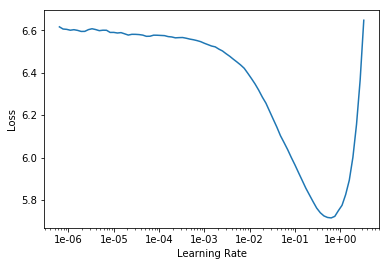

In [84]:
learn.recorder.plot()

In [85]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.168473,3.505126,0.429459,17:20:55


In [86]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.466435,3.087575,0.480409,22:53:47


In [87]:
learn.predict("Microsoft stock price", n_words=10)

'Microsoft stock price is amazing and you can gain the most off of'

In [88]:
learn.save_encoder('ft_enc')

In [89]:
classifier = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.2)
classifier.load_encoder('ft_enc')

In [90]:
data_clas.show_batch()

text,target
"xxbos athletes in general make way too much money ! ! ! -with linkedin and the xxmaj xbox , all of xxmaj microsoft 's wildest dreams are coming true ( xxup msft , xxup lnkd ) http : / / ift.tt / 24mxxhs # xxmaj opines on # xxup it ● xxup it - xxmaj what @ xxmaj microsoft 's $ 35 billion @ linkedin acquisition reveals about bubbles .",0.0
xxbos xxmaj microsoft xxmaj corporation ( xxup msft ) xxmaj phil xxmaj spencer xxmaj talks xxmaj about xxmaj halo xxmaj on ... http : / / dlvr.it / xxunk # microsoftcorporation-@ xxunk https : / / www.yahoo.com / finance / news / xxunk … this is bullshit xxunk guy mad 2 m off msft deal - i taught my mom how to use facetime and now she 's obsessed with,1.0
"xxbos xxmaj passed my 70 - 347 ! on the first xxup try ! https : / / ift.tt / xxunk xxmaj hello all , if anyone need any tips or help for studying for the exam , message me ! xxmaj tips : xxmaj lynda - they have a really good course on it , and learn the powershell commands and their order ! xxmaj for the new section",1.0
"xxbos i xxunk # xxmaj microsoft xxmaj azure xxmaj added to xxmaj ingram xxmaj micro xxmaj cloud xxmaj offering in xxup uk . xxmaj read more : http : / / owler.us / xxunk $ xxup msft-$ xxup msft : xxmaj cloud is a ‘ once in a xxunk opportunity for xxmaj microsoft , analyst says : http : / / www . stocknewswires.com / 2016 / 10 / 21",1.0
"xxbos # xxmaj microsoft : xxmaj keep xxmaj calm xxmaj but xxmaj vigilant xxmaj about xxmaj ransomware . xxmaj read more : http : / / owler.us / xxunk $ xxup msft-@ xxunk @ mattrosoff agree with your comments . xxmaj my company was acquired by xxup msft , nice experience so far .- xxmaj prince , xxmaj the xxmaj bot xxmaj wars , and xxmaj office 365 xxmaj news",0.0


In [91]:
classifier.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,time
0,0.442446,0.242767,5:01:50


In [92]:
classifier.freeze_to(-2)
classifier.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,time
0,0.264337,0.240925,4:58:19


In [93]:
classifier.unfreeze()
classifier.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,time
0,0.213539,0.230882,6:56:54


In [105]:
classifier.predict("Will Microsoft sotcks are going high")

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(FloatItem [0.510228], tensor([0.5102]), tensor([0.5102]))

In [97]:
#confusion matrix

In [101]:
from fastai.vision import *
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [99]:
preds, y, losses = classifier.get_preds(with_loss= True)

In [100]:
yHat = preds.numpy()
yHat = np.rint(np.squeeze(yHat))

y = y.numpy()
y = np.rint(np.squeeze(y))

In [102]:
print(classification_report(yHat,y))

              precision    recall  f1-score   support

         0.0       0.25      0.45      0.32        20
         1.0       0.78      0.60      0.68        67

   micro avg       0.56      0.56      0.56        87
   macro avg       0.52      0.52      0.50        87
weighted avg       0.66      0.56      0.60        87



In [103]:
accuracy_score(yHat,y)

0.5632183908045977